In [1]:
%matplotlib inline
import numpy as np
import yt as yt
import cgs as cgs
import copy
import matplotlib.pyplot as plt
import dwarf as dw
yt.funcs.mylog.setLevel(50)

line_width = 2.5

using cgs py


In [2]:
import yt
x = 1.0 * yt.units.km
unit = x.units

x = 1000.0 * yt.units.m
x.convert_to_units(unit)

1.0 km

In [3]:
LT_dir = '/home/emerick/Research/dwarfs/flash_runs/leo_T/'


In [4]:
sim_names = ['LT_n075_v2_nh4', 'LT_n075_v4_nh4', 'LT_n150_v2_nh4', 'LT_n150_v4_nh4']


In [5]:
sim_dirs = {}
for name in sim_names:
    name = 'SN_' + name
    sn_fpath = LT_dir + name + '/'    
    sim_dirs[name] = {'cfloor_nsn'    : sn_fpath + '0000_cfloor_nsn/',
                      'cfloor_global' : sn_fpath + '0000_cfloor_global/',
                      'cfloor_global_x2' : sn_fpath + '0000_cfloor_global_x2/',
                      'cfloor_global_x5' : sn_fpath + '0000_cfloor_global_x5/',
                      'cfloor_global_sb' : sn_fpath + '0000_cfloor_global_sb/',
                      'cfloor_global_Ex5' : sn_fpath + '0000_cfloor_global_Ex5/'}

dwarf_dict = {}
for name in sim_dirs:
    dwarf_dict[name] = {}
    for sub_name in sim_dirs[name]:
        
        try:
            dwarf_dict[name][sub_name] = dw.simulation('dwarf_fullp_',ds_dir=sim_dirs[name][sub_name])
        except:
            print 'does note exist ', name , sub_name
#for name in sim_names:
#    sim_dirs[name] = LT_dir + name + '/'

DWARF ANALYSIS : [INIT] Did not find parameter: sim_rhoCloud
DWARF ANALYSIS : [INIT] Did not find parameter: sim_rho1rm
DWARF ANALYSIS : [INIT] Did not find parameter: sim_rho2rm
DWARF ANALYSIS : [INIT] Did not find parameter: sim_rhoRL
DWARF ANALYSIS : [INIT] Did not find parameter: sim_pAmbient
DWARF ANALYSIS : [INIT] Did not find parameter: sim_RL
DWARF ANALYSIS : [INIT] Did not find parameter: sim_rScale
DWARF ANALYSIS : [INIT] Did not find parameter: particleFileIntervalTime
DWARF ANALYSIS : [INIT] Looking for supernova files
DWARF ANALYSIS : trying to set units in supernova
DWARF ANALYSIS : [INIT] Did not find parameter: sim_rhoCloud
DWARF ANALYSIS : [INIT] Did not find parameter: sim_rho1rm
DWARF ANALYSIS : [INIT] Did not find parameter: sim_rho2rm
DWARF ANALYSIS : [INIT] Did not find parameter: sim_rhoRL
DWARF ANALYSIS : [INIT] Did not find parameter: sim_pAmbient
DWARF ANALYSIS : [INIT] Did not find parameter: sim_RL
DWARF ANALYSIS : [INIT] Did not find parameter: sim_rScale
D

SN_LT_n150_v4_nh4 cfloor_global   stripping time 2.159
SN_LT_n150_v4_nh4 cfloor_global_Ex5   stripping time 2.334
SN_LT_n150_v4_nh4 cfloor_global_x2   stripping time 2.184
SN_LT_n150_v4_nh4 cfloor_global_x5   stripping time 1.830
SN_LT_n150_v4_nh4 cfloor_nsn   stripping time 2.578
SN_LT_n150_v4_nh4 cfloor_global_sb   stripping time 0.670
SN_LT_n075_v2_nh4 cfloor_global   stripping time 5.650
Grav file does not exist for  SN_LT_n075_v2_nh4cfloor_global_Ex5
Grav file does not exist for  SN_LT_n075_v2_nh4cfloor_global_x2
Grav file does not exist for  SN_LT_n075_v2_nh4cfloor_global_x5
SN_LT_n075_v2_nh4 cfloor_nsn   stripping time 3.302
Grav file does not exist for  SN_LT_n075_v2_nh4cfloor_global_sb
SN_LT_n150_v2_nh4 cfloor_global   stripping time 6.330
Grav file does not exist for  SN_LT_n150_v2_nh4cfloor_global_Ex5
Grav file does not exist for  SN_LT_n150_v2_nh4cfloor_global_x2
Grav file does not exist for  SN_LT_n150_v2_nh4cfloor_global_x5
SN_LT_n150_v2_nh4 cfloor_nsn   stripping time 10

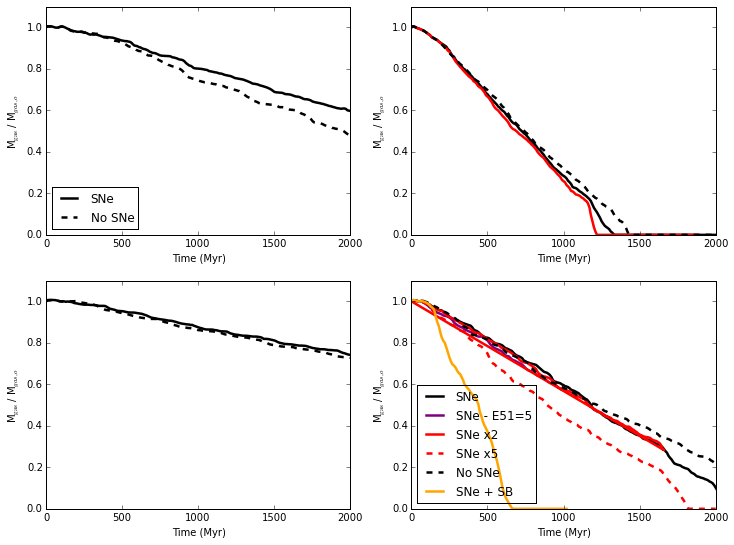

In [13]:
ax_loc = {'SN_LT_n075_v2_nh4' : (0,0), 'SN_LT_n075_v4_nh4' : (0,1) ,
          'SN_LT_n150_v2_nh4' : (1,0), 'SN_LT_n150_v4_nh4' : (1,1)}
linestyles = {'cfloor_nsn' : '--', 'cfloor_global' : '-', 
              'cfloor_global_x2' : '-', 'cfloor_global_x5' : '--',
              'cfloor_global_sb' : '-', 'cfloor_global_Ex5' : '-'}

colors = {'cfloor_nsn' : 'black', 'cfloor_global' : 'black', 
          'cfloor_global_x2' : 'red', 'cfloor_global_x5' : 'red',
          'cfloor_global_sb' : 'orange', 'cfloor_global_Ex5' : 'purple'}

fig, ax = plt.subplots(2,2) 

xlabel = r'Time (Myr)'
ylabel = r'M$_{\rm{gas}}$ / M$_{gas,o}$'

label_dict = {'cfloor_nsn' : "No SNe", 'cfloor_global' : 'SNe',
              'cfloor_global_x2' : 'SNe x2', 'cfloor_global_x5' : 'SNe x5',
              'cfloor_global_sb' : 'SNe + SB', 'cfloor_global_Ex5' : 'SNe - E51=5'}


for name in sim_dirs:
    
    for sub_name in sim_dirs[name]:
        
        try:
            data = np.genfromtxt(sim_dirs[name][sub_name] + 'grav_bound_mass.dat', names=True)
            t = data['t']
            m = data['m']        
        
                             
            ax[ax_loc[name]].plot(t, m/m[0], lw=line_width, color=colors[sub_name], 
                              ls=linestyles[sub_name], label = label_dict[sub_name])

            ax[ax_loc[name]].set_xlim(0.0,2000.0)
            ax[ax_loc[name]].set_ylim(0.0,1.1   )
            ax[ax_loc[name]].set_xlabel(xlabel); ax[ax_loc[name]].set_ylabel(ylabel)

            
            t_strip = dw.predict_stripping_time(t, m, 100.0)
            
            print name + ' ' + sub_name + '   stripping time %.3f'%(t_strip/1000.0)
            
        except:
            print 'Grav file does not exist for ', name + sub_name

ax[(0,0)].legend(loc='lower left')
ax[(1,1)].legend(loc='lower left')

fig.set_size_inches(12,9)


[]

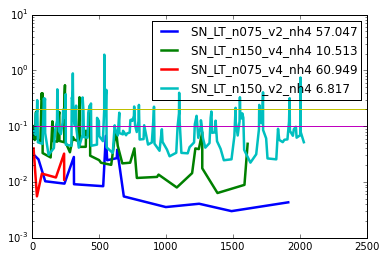

In [7]:
for name in dwarf_dict:
    dwarf = dwarf_dict[name]['cfloor_global']
    try:
        t, rate = dwarf.SN.rate()
        
        average = np.average(rate * cgs.Myr)
        
        plt.plot(t / cgs.Myr, rate * cgs.Myr, lw = line_width, label = name + ' %0.3f'%(1.0/average))
        
        
        
    except:
        print 'no file for ', name
        
        
plt.plot(plt.xlim(), [1.0 / 10.0]*2)
plt.plot(plt.xlim(), [1.0/5.0]*2)
plt.legend(loc='best')
plt.semilogy()

SN rate =  0.0323529411765
no file for  cfloor_global_Ex5
SN rate =  0.126470588235
SN rate =  0.122352941176
no file for  cfloor_nsn
no file for  cfloor_global_sb


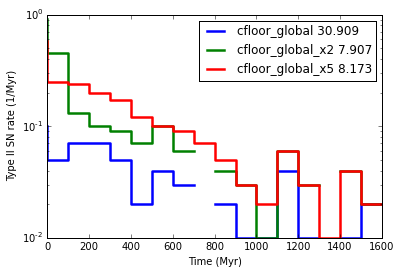

In [8]:
#dwarf = dwarf_dict['SN_LT_n150_v4_nh4']


for name in dwarf_dict['SN_LT_n150_v4_nh4']:

    dwarf = dwarf_dict['SN_LT_n150_v4_nh4'][name]
    try:
        t, rate = dwarf.SN.rate(binsize=100.0*cgs.Myr)
        
        average = np.average(rate * cgs.Myr)
        
        plt.step(t[:-1] / cgs.Myr, rate * cgs.Myr, lw = line_width, label = name + ' %0.3f'%(1.0/average))
        
        print 'SN rate = ', average
        
    except:
        print 'no file for ', name
        
        
#plt.plot(plt.xlim(), [1.0 / 10.0]*2)
#plt.plot(plt.xlim(), [1.0/5.0]*2)
plt.legend(loc='best')
plt.semilogy()
plt.ylabel('Type II SN rate (1/Myr)')
plt.xlabel('Time (Myr)')

In [9]:
dwarf = dwarf_dict['SN_LT_n150_v4_nh4']['cfloor_global']

In [10]:
t, rate= dwarf.SN.rate(binsize=50.0*cgs.Myr)

In [11]:
print t/cgs.Myr
print rate * cgs.Myr

[    0.    50.   100.   150.   200.   250.   300.   350.   400.   450.
   500.   550.   600.   650.   700.   750.   800.   850.   900.   950.
  1000.  1050.  1100.  1150.  1200.  1250.  1300.  1350.  1400.  1450.
  1500.  1550.  1600.  1650.]
[ 0.08  0.12  0.04  0.06  0.12  0.02  0.08  0.06  0.08  0.02  0.02  0.02
  0.06  0.02  0.02  0.04  0.    0.    0.04  0.    0.    0.02  0.    0.02
  0.04  0.04  0.    0.02  0.    0.    0.    0.02  0.04]


SN rate =  0.0323529411765
no file for  cfloor_global_Ex5
SN rate =  0.126470588235
SN rate =  0.122352941176
no file for  cfloor_nsn
no file for  cfloor_global_sb


/home/emerick/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: RuntimeWarning: divide by zero encountered in divide


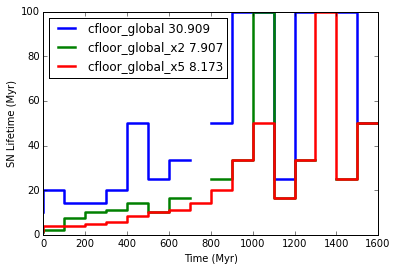

In [12]:
#dwarf = dwarf_dict['SN_LT_n150_v4_nh4']


for name in dwarf_dict['SN_LT_n150_v4_nh4']:

    dwarf = dwarf_dict['SN_LT_n150_v4_nh4'][name]
    try:
        t, rate = dwarf.SN.rate(binsize=100.0*cgs.Myr)
        
        average = np.average(rate * cgs.Myr)
        
        plt.step(t[:-1] / cgs.Myr, 1.0/(rate * cgs.Myr), lw = line_width, label = name + ' %0.3f'%(1.0/average))
        
        print 'SN rate = ', average
        
    except:
        print 'no file for ', name
        
        
#plt.plot(plt.xlim(), [1.0 / 10.0]*2)
#plt.plot(plt.xlim(), [1.0/5.0]*2)
plt.legend(loc='best')
plt.ylabel('SN Lifetime (Myr)')
plt.xlabel('Time (Myr)')

In [22]:


for name in sim_dirs:
    
    for sub_name in sim_dirs[name]:
        
        try:
            data = np.genfromtxt(sim_dirs[name][sub_name] + 'grav_bound_mass.dat', names=True)
            t = data['t']
            m = data['m']        

            t_strip = dw.predict_stripping_time(t, m, 100.0)
            
            print name ,  '%18s'%(sub_name) , ' stripping time %001.3f'%(t_strip/1000.0)
        
        except:
            continue
        


SN_LT_n150_v4_nh4      cfloor_global  stripping time 2.159
SN_LT_n150_v4_nh4  cfloor_global_Ex5  stripping time 2.334
SN_LT_n150_v4_nh4   cfloor_global_x2  stripping time 2.184
SN_LT_n150_v4_nh4   cfloor_global_x5  stripping time 1.830
SN_LT_n150_v4_nh4         cfloor_nsn  stripping time 2.578
SN_LT_n150_v4_nh4   cfloor_global_sb  stripping time 0.670
SN_LT_n075_v2_nh4      cfloor_global  stripping time 5.650
SN_LT_n075_v2_nh4         cfloor_nsn  stripping time 3.302
SN_LT_n150_v2_nh4      cfloor_global  stripping time 6.330
SN_LT_n150_v2_nh4         cfloor_nsn  stripping time 10.710
SN_LT_n075_v4_nh4      cfloor_global  stripping time 1.340
SN_LT_n075_v4_nh4   cfloor_global_x2  stripping time 1.220
SN_LT_n075_v4_nh4         cfloor_nsn  stripping time 1.440
